# Проект по Анализу данных 2023

__Тема:__ Исследование различных групп пациентов на наличие болезни сердца или инсульта

### Авторы:
- Махтина Софья
- Рыбьякова Елизавета
- Халифаева Лейла

In [2]:
import numpy as np
from scipy import stats
import pandas as pd
from sklearn.model_selection import train_test_split as sample
from sklearn.manifold import MDS
# делаем импорт всех необходимых библиотек
import seaborn as sns
import matplotlib.pyplot as plt

## Часть 1: Предварительныя обработка данных и визуализация

### Датасет про болезни сердца (heart disease)

В столбцах числовые данные
* Бинарные переменные: 'HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex' они принимают значения 0 или 1
* Непрерывные переменные: 'BMI', 'Diabetes', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income' могут принимать любые значения

In [3]:
df = pd.read_csv('heart_disease_health_indicators_BRFSS2015.csv')
# скачиваем данные

display(df.describe().T)# выводим статистическую сводку (с помощью метода describe) в транспонированном виде, для удобства анализа
df.info() # выводим небольшую часть таблицы, чтоб проверить, что все сделано верно

,count,mean,std,min,25%,50%,75%,max
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
Diabetes,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [4]:
_, data = sample(df, test_size=3000, stratify=df['HeartDiseaseorAttack'])#  в исходном датасете уж очень много наблдений, оставим 3000 из них с помощью sample 
data.shape #  shape вернет нам кортеж с размерностью датасета, это для того, чтоб убедится, что мы обрезали данные так как и хотели

(3000, 22)

In [5]:
# Пропусков нет
data.isna().sum() # функция isna ищет пропуски в данных, функция sum суммировала бы их для получения общего количества, но пропусков в данных нет, поэтому везде стоят нули

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Построим диаграмму рассеяния сжатых данных с помощью многомерного шкалироования, удалим данных, которые выходят за рамки 2х стандартных отклонений хотя бы по одной MDS компоненте

In [26]:
data_mds = MDS().fit_transform(data) # MDS() делает нам многомерное шкалирование, многомерное так так  унас более 2 параметров для сравнения, а с помощью .fit_transform можно сразу и вычислить формулировку для преобразования и выполнить его.

In [69]:
def remove_outliers(data, threshold=2): # этой функцией мы хотим найти и  удалить выбросы из данных, если z-score превышает по модулю threshold
    z_scores = np.abs(stats.zscore(data)) # стандартая функция для рассчета z-score
    inliers = (z_scores < threshold).all(axis=1)
    filtered_data = data[inliers]
    return filtered_data, inliers
# используем именно диаграмму рассеяния так как есть сопряженные числовые данные
def plot_data(data, filtered_data): # строим две диаграммы рассеяния: для изначальных данных и преобразованных ранее
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], label='Original Data', ax=ax[0])
    ax[0].set_title('Original Data')
    sns.scatterplot(
        x=filtered_data[:, 0],
        y=filtered_data[:, 1],
        label='Filtered Data',
        color='red',
        ax=ax[1]
    ) # стандартные операции для построения графиков
    ax[1].set_title('Filtered Data (Outliers Removed)')
    plt.show()

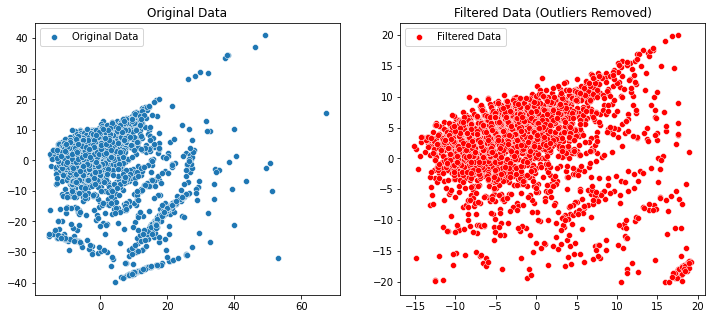

In [73]:
data_mds_inliers, inliers = remove_outliers(data_mds)
plot_data(data_mds, data_mds_inliers)


In [76]:
data = data.loc[inliers]
data.shape # было изначально 3000 наблюдений, после удаления выбросов осталось 2664, выбросы составили более 10% всех наблдений

(2664, 22)

In [152]:
def corr_sig(df): # написали функцию для рассчета p-value
    p_matrix = np.zeros(shape=(df.shape[1], df.shape[1]))# создали матрицу из нулей,  по факту ее размерность 1*1
    for col in df.columns:
        for col2 in df.drop(col, axis=1).columns:
            _ , p = stats.spearmanr(df[col],df[col2]) # Вычислили коэффициент корреляции Спирмена с соответствующим p-value
            p_matrix[df.columns.to_list().index(col), df.columns.to_list().index(col2)] = p
    return p_matrix

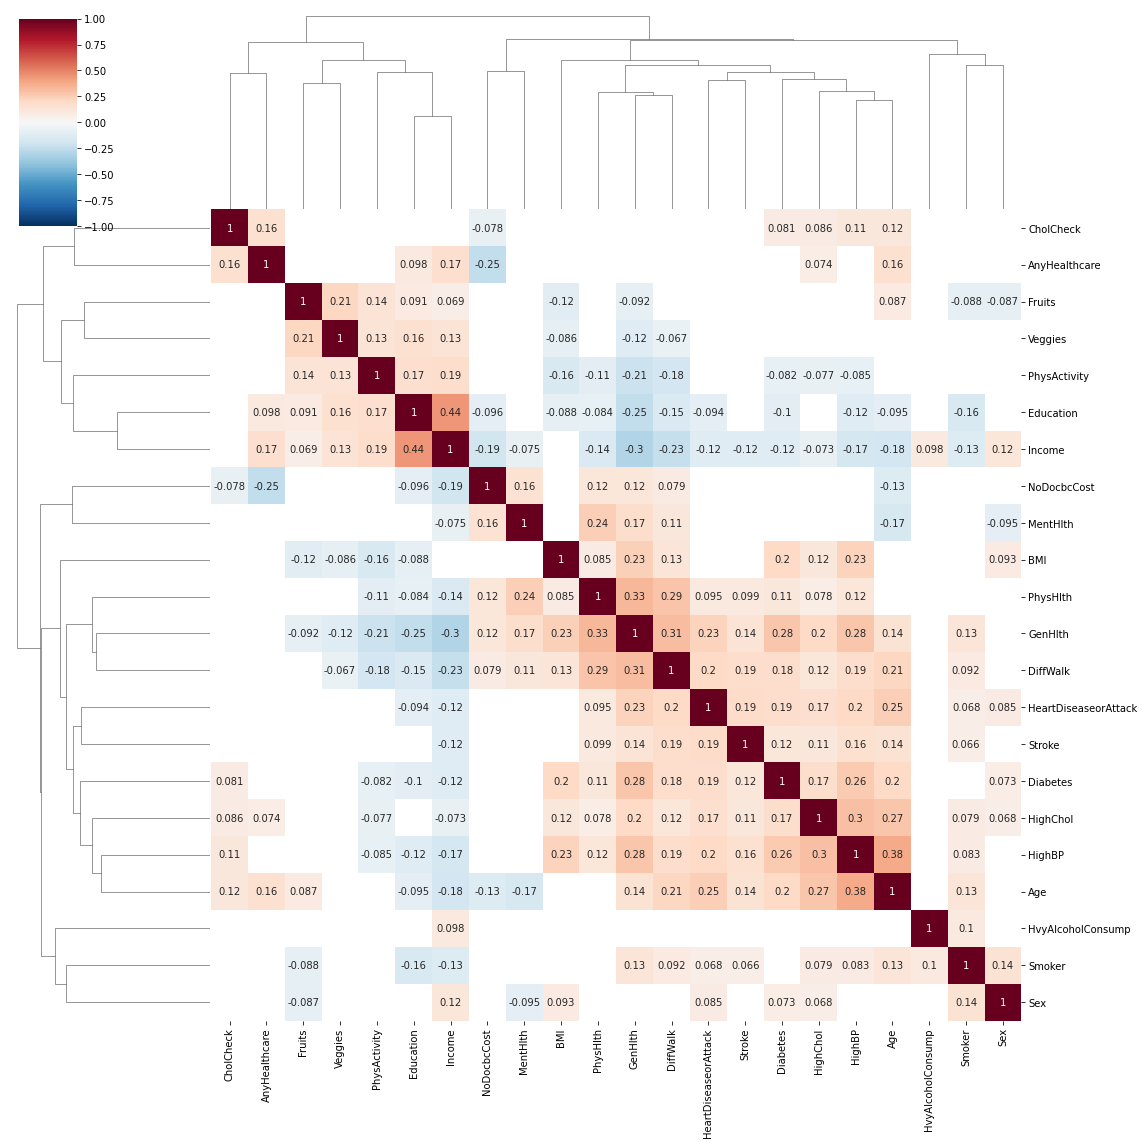

In [153]:
sns.clustermap(
    data.corr(method='spearman'),
    cmap='RdBu_r',
    vmin=-1,
    vmax=1,
    annot=True,
    mask=corr_sig(data) >= 0.001,
    figsize=(16, 16)
); # стоим матрицу корреляций Спирмена

Выше изображена матрица корреляций Спирмена, однако пары переменнных, для которых корреляция не значима не отображаются . Корреляция не занчима, если она меньше 0,001

HeartDiseaseorAttack имеет значимую положительную корреляцию с Age, HighBP, HighChol, Diabetes, Stroke, DiffWalk, GenHith, PhisHith, Smoker, Sex. И отрицательную коореяцию с Education и Income. Что логично: возраст  и различные проблемы со здоровьем лишь повышают вероятность сердечных заболеваний или инсультов, а образования и доход, наоборот, снижают, так как обеспечивают человеку занятость на каждый день, а следовательно и активный образ жизни, что защищает от заболеваний сердца и инсультов.

In [132]:
def get_chi2_pval(col_name):
    ct = pd.crosstab( # crosstab делает перекрестную таблицу HeartDiseaseorAttack  со всеми остальными колонками
        data['HeartDiseaseorAttack'],
        data[col_name]
    ) # написали функцию для рассчета p-value теста хи-квадрат
    return format(stats.chi2_contingency(ct)[1], f'.1e') 

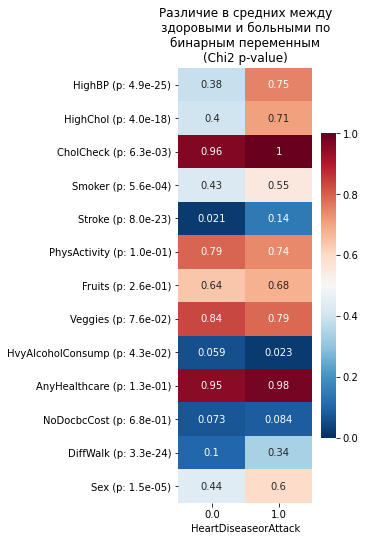

In [141]:
plt.figure(figsize=(3, 8))
# стандартные операции для построения графика)
bin_means = data[[
    'HighBP', 
    'HighChol', 
    'CholCheck',
    'Smoker',
    'Stroke',
    'PhysActivity',
    'Fruits',
    'Veggies',
    'HvyAlcoholConsump', 
    'AnyHealthcare', 
    'NoDocbcCost', 
    'DiffWalk', 
    'Sex'
]].groupby(df['HeartDiseaseorAttack']).mean().T # группируем данные по HeartDiseaseorAttack, так как интерсно посмтотреть на различия в показателях больных и зрововых людей 

index = bin_means.index + ' (p: ' + bin_means.index.map(get_chi2_pval) + ')'

sns.heatmap(
    bin_means.set_index(index),
    cmap='RdBu_r',
    vmin=0,
    vmax=1,
    annot=True,
    cbar_kws={'shrink': 0.7}
)
plt.title(
    'Различие в средних между\nздоровыми и больными по\nбинарным переменным\n(Chi2 p-value)'
);

Больным характерны более частый HighBP, HighChol, Smoker, Stroke, DiffWalk. Кроме того, среди больных чаще встречаются мужчины

С болезнью коррелируют медицинские показатели, такие как уровень холестерина и высокое давление, однако есть и поведенчские факторы, например, курение, уровень образования и уровень дохода, последние два отрицательно коррелирует с болезнью. Наиболее часто втсречается болезнь у мужчин, а также показатель имеет положительную корреляцию с возрастом.

In [6]:
df

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [7]:
x=df['HeartDiseaseorAttack']
y=df['Stroke']
import matplotlib as plt
df.plot(kind='scatter', x, y, figsize=(3, 4))


SyntaxError: positional argument follows keyword argument (1587339306.py, line 4)

### Датасет про инсульты (stroke)

* Бинарные переменные: 'hypertension', 'heart_disease', 'stroke' они принимают лишь 2 значения: 0 или 1, что соответствует True или False
* Непрерывне: 'bmi', 'avg_glucose_level' это индекс массы тела и средний уровень глюкозы в крови соотвественно, они получены посредством измерений и могут принимать бесконечное количество значений
* Остальные переменные категориальные, которые определим более подробно и обработаем

In [2]:
df = pd.read_csv('full_data.csv') # скачиваем данные


display(df.describe().T) # выводим статистическую сводку (с помощью метода describe) в транспонированном виде, для удобства анализа
df.info() # выводим небольшую часть таблицы, чтоб проверить, что все сделано верно

,count,mean,std,min,25%,50%,75%,max
age,4981.0,43.419859,22.662755,0.08,25.00,45.00,61.00,82.00
hypertension,4981.0,0.096165,0.294848,0.00,0.00,0.00,0.00,1.00
heart_disease,4981.0,0.055210,0.228412,0.00,0.00,0.00,0.00,1.00
avg_glucose_level,4981.0,105.943562,45.075373,55.12,77.23,91.85,113.86,271.74
bmi,4981.0,28.498173,6.790464,14.00,23.70,28.10,32.60,48.90
stroke,4981.0,0.049789,0.217531,0.00,0.00,0.00,0.00,1.00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [8]:
for col in df.select_dtypes('object').columns: # с помощью цикла мы можем посчитать по каждому объекту сколько "случаев" на него приходится
    display(df[col].value_counts()) # сначала select_dtypes возвращает нам подмножество столбцов  на основе типов столбцов dtypes, а value_counts считает количество уникальных сзначений для каждого ряда

Female    2907
Male      2074
Name: gender, dtype: int64

Yes    3280
No     1701
Name: ever_married, dtype: int64

Private          2860
Self-employed     804
children          673
Govt_job          644
Name: work_type, dtype: int64

Urban    2532
Rural    2449
Name: Residence_type, dtype: int64

never smoked       1838
Unknown            1500
formerly smoked     867
smokes              776
Name: smoking_status, dtype: int64

*По итогу видим, что больше задействоавано в опросе женщин, в качестве рода деятельности преобладают самозанятые (private work type), больше людей, которые проживают в городской местности, преобладают некурящие*

In [11]:
df = pd.get_dummies(
    df,
    columns=df.select_dtypes('object').columns,
    drop_first=True
) # мы перобразуем категориальные переменные в dummy variables

In [12]:
_, data = sample(df, test_size=3000, stratify=df['stroke']) #  в исходном датасете уж очень много наблдений, оставим 3000 из них с помощью sample 
data.shape #  shape вернет нам кортеж с размерностью датасета, это для того, чтоб убедится, что мы обрезали данные так как и хотели

(3000, 15)

In [13]:
# Пропусков нет
data.isna().sum() # функция isna ищет пропуски в данных, функция sum суммировала бы их для получения общего количества, но пропусков в данных нет, поэтому везде стоят нули

age                               0
hypertension                      0
heart_disease                     0
avg_glucose_level                 0
bmi                               0
stroke                            0
gender_Male                       0
ever_married_Yes                  0
work_type_Private                 0
work_type_Self-employed           0
work_type_children                0
Residence_type_Urban              0
smoking_status_formerly smoked    0
smoking_status_never smoked       0
smoking_status_smokes             0
dtype: int64

Построим диаграмму рассеяния сжатых данных с помощью многомерного шкалироования, удалим данные, которые выходят за рамки 2х стандартных отклонений хотя бы по одной MDS компоненте

In [16]:
data_mds = MDS().fit_transform(data) # MDS() делает нам многомерное шкалирование, многомерное так так  унас более 2 параметров для сравнения, а с помощью .fit_transform можно сразу и вычислить формулировку для преобразования и выполнить его.

In [17]:
def remove_outliers(data, threshold=2): # этой функцией мы хотим найти и  удалить выбросы из данных, если z-score превышает по модулю threshold
    z_scores = np.abs(stats.zscore(data)) # стандартая функция для рассчета z-score
    inliers = (z_scores < threshold).all(axis=1)
    filtered_data = data[inliers]
    return filtered_data, inliers
# используем именно диаграмму рассеяния так как есть сопряженные числовые данные, также  зависимая переменная имеет несколько значений для каждой независимой переменной 
def plot_data(data, filtered_data): # строим две диаграммы рассеяния: для изначальных данных и преобразованных ранее
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(x=data[:, 0], y=data[:, 1], label='Original Data', ax=ax[0])
    ax[0].set_title('Original Data')
    sns.scatterplot(
        x=filtered_data[:, 0],
        y=filtered_data[:, 1],
        label='Filtered Data',
        color='red',
        ax=ax[1]
    ) # стандартные операции для построения графиков
    ax[1].set_title('Filtered Data (Outliers Removed)')
    plt.show()

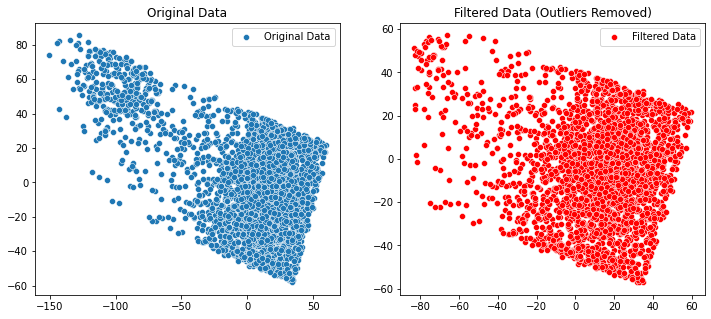

In [18]:
data_mds_inliers, inliers = remove_outliers(data_mds)
plot_data(data_mds, data_mds_inliers)


In [19]:
data = data.loc[inliers]
data.shape # было изначально 3000 наблюдений, после удаления выбросов осталось 2719, выбросы составили примерно 10% всех наблдений

(2719, 15)

In [20]:
def corr_sig(df): # написали функцию для рассчета p-value
    p_matrix = np.zeros(shape=(df.shape[1], df.shape[1])) # создали матрицу из нулей,  по факту ее размерность 1*1
    for col in df.columns:
        for col2 in df.drop(col, axis=1).columns:
            _ , p = stats.spearmanr(df[col],df[col2]) # Вычислили коэффициент корреляции Спирмена с соответствующим p-value
            p_matrix[df.columns.to_list().index(col), df.columns.to_list().index(col2)] = p
    return p_matrix 

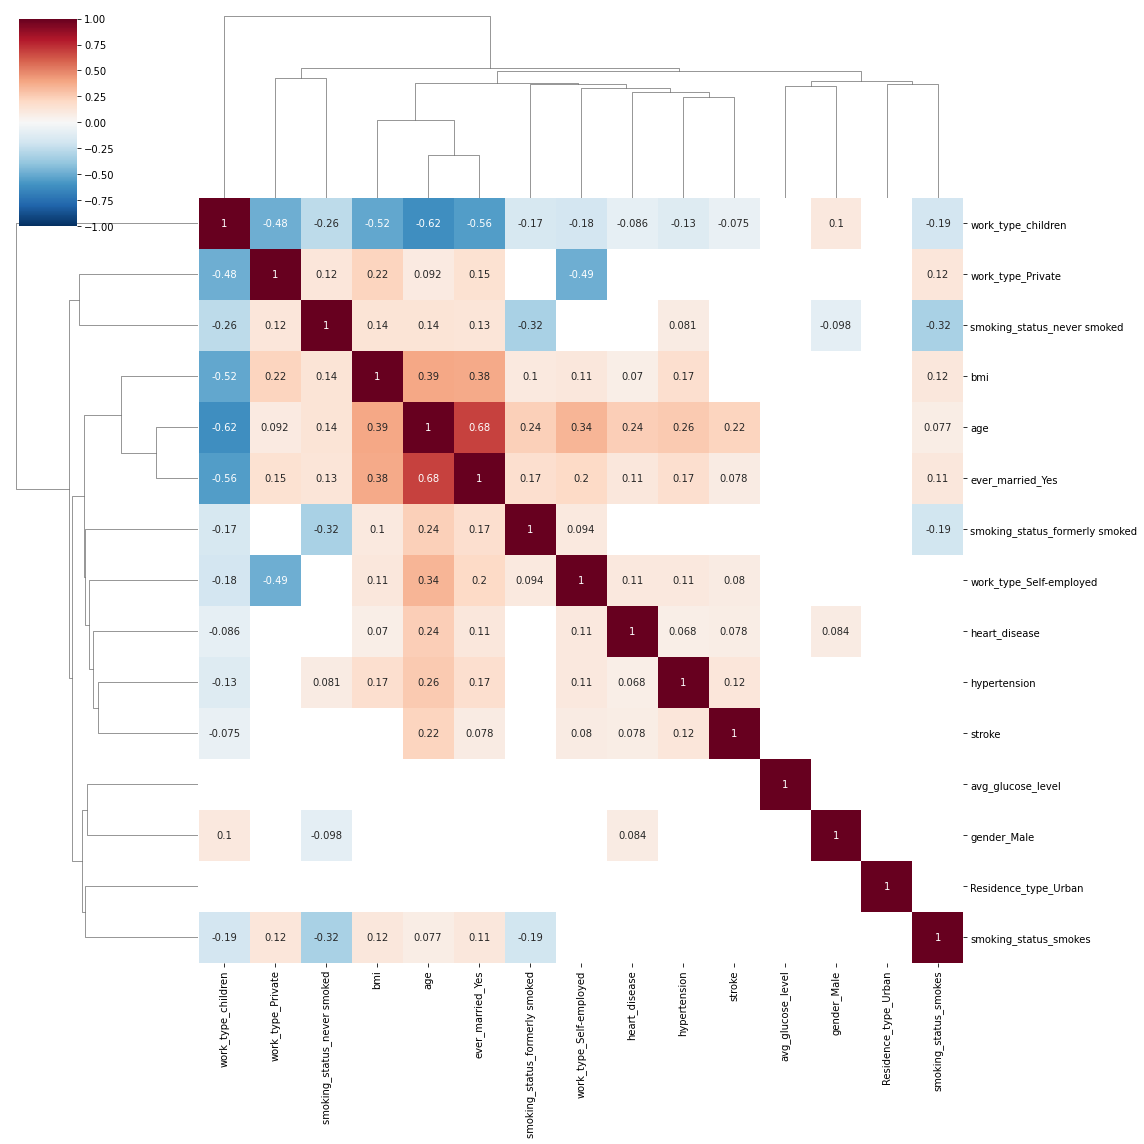

In [21]:
sns.clustermap(
    data.corr(method='spearman'),
    cmap='RdBu_r',
    vmin=-1,
    vmax=1,
    annot=True,
    mask=corr_sig(data) >= 0.001,
    figsize=(16, 16)
); # стоим матрицу корреляций Спирмена

Выше изображена матрица корреляций Спирмена, однако пары переменнных, для которых корреляция не значима не отображаются. Не значима корреляция, которая меньше 0,001

HeartDiseaseorAttack имеет значимую положительную корреляцию с гипертезией, заболеваниями сердца, фактом, возрастом, самозанятостью. И отрицательную коореяцию с работой с детьми. Что в принципе логично: люди, имеющие проблемы со здоровьем более склонны к сердечным заболеваниям или инсультам, а вот наличие работы и детей обеспечивает постоянную активность, что улучшает здоровье и снижает вероятность сердечных заболеваний и инсультов.

In [24]:
def get_chi2_pval(col_name):
    ct = pd.crosstab( # crosstab делает перекрестную таблицу stroke  со всеми остальными колонками
        data['stroke'],
        data[col_name]
    ) # написали функцию для рассчета p-value теста хи-квадрат
    return format(stats.chi2_contingency(ct)[1], f'.1e') 

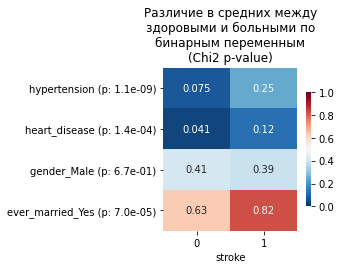

In [29]:
plt.figure(figsize=(3, 3))
# стандартные операции для построения графика)
bin_means = data[[
    'hypertension',
    'heart_disease',
    'gender_Male',
    'ever_married_Yes'
]].groupby(df['stroke']).mean().T # группируем данные по stroke, так как интерсно посмтотреть на различия в показателях больных и зрововых людей 

index = bin_means.index + ' (p: ' + bin_means.index.map(get_chi2_pval) + ')'

sns.heatmap(
    bin_means.set_index(index),
    cmap='RdBu_r',
    vmin=0,
    vmax=1,
    annot=True,
    cbar_kws={'shrink': 0.7}
)
plt.title(
    'Различие в средних между\nздоровыми и больными по\nбинарным переменным\n(Chi2 p-value)'
);

Больным характерны более частая гипертезия, заболевания сердца и факт пребывания в браке. Между мужчинами и женщинами нет различий в частоте заболевания.

*Использовались следующие источники информации: 
    https://docs.scipy.org/doc/scipy/reference/index.html 
        https://pandas.pydata.org/pandas-docs/stable/reference/frame.html 
            https://numpy.org/doc/stable/reference/routines.array-creation.html 
                https://runebook.dev/ru/docs/scikit_learn/modules/generated/sklearn.manifold.mds 
                    https://spec-zone.ru/scikit_learn/modules/generated/sklearn.manifold.mds*

Что касается создания новых признаков, мы подумали о том, что логично бы было создать  следующие признаки:

1) Дедушки-бабушки VS молодые женщины и мужчины
(так как пожилые люди склонны иметь высоко артериальное давление, лишний вес, повышенный холестерин, диабет, они также не работают, меньше занимаются спортом, скорее всего имеют детей и были когда-либо женаты)
Мы попробуем это проверить на наших данных и поделить людей на пожилых и молодых

2) Также по "анализам" можно предположить следит ли за здоровьем человек (занимается ли спортом, питается ли правильно, ходит ли к врачам)
у нас есть какие-то отдельные переменные, говорящие об этом типо health_care_check или smoker, но мы хотели бы это объединить 
и посмотреть на картину в целом
чтобы потом понять какие показатели болезни сердца и инсульта будут у здоровых и нездоровых людей 

Гипотезы:
1) Построим гистограмму, чтоб понять распределение 
(возраст - число заболевших; IBM -число заболевших, уровень холестерина - число заболевших и тд) 
попробуем найти взаимосвязи и позже проверить гипотезы:
    1) С возрастом количеством болезней сердца/ инсульта увеличиваются
    2) Чем больше масса тела, тем больше вероятность возникновения болезней сердца/ инсульта 
    3) Чем выше уровень холестерина, тем больше вероятность возникновения количеством болезней сердца/ инсульта увеличиваются
    
    
Для dummy variables:
Мы будем также смотреть на среднее, чтобы построить ДИ для разности мат ожиданий тех, кто имел и не имел болезнь сердца/инсульт
и уже основываясь на этом проверим следующие гипотезы:
    
    1) 
    2) 
    3) 
    
Для непрерывных переменных:    
Мы будем также смотреть на доли, чтобы построить ДИ для разности теоретических долей тех, кто имел и не имел болезнь сердца/инсульт
и уже основываясь на этом проверим следующие гипотезы:
    
    1)
    2)
    3) 

Машинное обучение:

Мы поделим данные на трейн и тест, учитывая то, что их необходимо стратифицировать по heart_disease или stroke, 
чтобы модель не переобучилась/ не недоучилась и показала адекватный скор
    
1) Мы хотим построить линейную регрессию, чтобы понять какой фактор влияет больше всего 
на болезнь сердца (heart_disease, датасет 1) и на инсульт (stroke, датасет 2) 


А в друг вес будет самый большой как раз у этих факторов (то есть инсульт у болезни сердца и болезнь сердца у инсульта).
Или у одинаковых факторов типо IBM, высокого холестерина или курения. Было бы круто! 
Также если вес при независимой переменной будет очень мальньким, мы сможем ее убрать 
(например, если увидим, что статус жениха никак или очень слабо влияет на болезнь сердца/инсульт в нашей регрессии)



2) Мы также хотим при помощи логистической регрессии предсказать инсульт и болезнь сердца на этих двух датасетах, 
чтобы понять с какими факторами скор будет лучше и при каких хуже. Также уберем менее влияющие. 
Для этого мы будем использовать различные метрики (Roc_auc, precision,recall, accuracy).
Подберем по сетке наилучшие гиперпараметры (penalty,solver, C), 
попробуем улучшить наш скор при помощи использования  другого классификатора - соседей или же других моделей -  леса или же бустинга

